In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
import random, numpy
import numpy as np
import utility as ut
from dataset import readDataSetNegative
import math
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt

IMAGE_SIZE = 16
NEURON_COUNT = IMAGE_SIZE * IMAGE_SIZE

BLACK = [0, 0, 0]
WHITE = [255, 255, 255]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


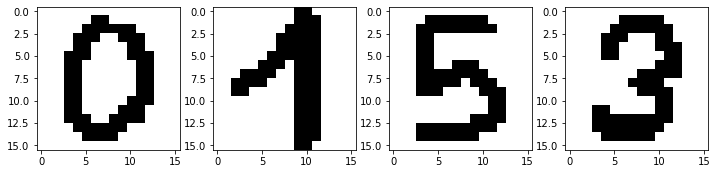

In [5]:
# Идеальные Образы

perfectSet = [ut.imageToData(Image.open('data/Ideal/0.png'), 1, -1),
              ut.imageToData(Image.open('data/Ideal/1.png'), 1, -1),
             ut.imageToData(Image.open('data/Ideal/5.png'), 1, -1),
             ut.imageToData(Image.open('data/Ideal/3.png'), 1, -1)]

fig = plt.figure(figsize=(50, 50))
fig.add_subplot(16, 16, 1)
plt.imshow(ut.dataToImage(perfectSet[0], 1, -1, 16))
fig.add_subplot(16, 16, 2)
plt.imshow(ut.dataToImage(perfectSet[1], 1, -1, 16))
fig.add_subplot(16, 16, 3)
plt.imshow(ut.dataToImage(perfectSet[2], 1, -1, 16))
fig.add_subplot(16, 16, 4)
plt.imshow(ut.dataToImage(perfectSet[3], 1, -1, 16))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


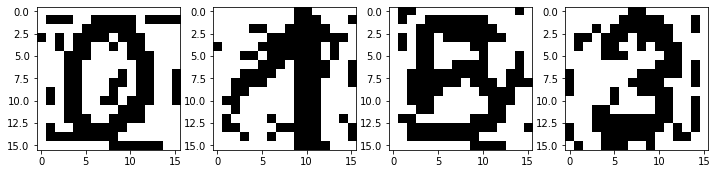

In [6]:
# Зашумленные Образы

noisySet = [ut.imageToData(Image.open('data/noise/0.png'), 1, -1), 
              ut.imageToData(Image.open('data/noise/1.png'), 1, -1),
           ut.imageToData(Image.open('data/noise/5.png'), 1, -1),
           ut.imageToData(Image.open('data/noise/3.png'), 1, -1)]

fig = plt.figure(figsize=(50, 50))
fig.add_subplot(16, 16, 1)
plt.imshow(ut.dataToImage(noisySet[0], 1, -1, 16))
fig.add_subplot(16, 16, 2)
plt.imshow(ut.dataToImage(noisySet[1], 1, -1, 16))
fig.add_subplot(16, 16, 3)
plt.imshow(ut.dataToImage(noisySet[2], 1, -1, 16))
fig.add_subplot(16, 16, 4)
plt.imshow(ut.dataToImage(noisySet[3], 1, -1, 16))

In [7]:
# Сумма по нейрону

# def S(n):
#     sum = 0
#     for i in range(NEURON_COUNT):
#         sum += noisySet[n][i] * W[i, n]
#     return sum

def S(y1, n):
    sum = 0
    for i in range(NEURON_COUNT):
        sum += y1[i] * W[i, n]
    return sum

In [8]:
# Очистка

def clearImage(nset):
    y1 = nset
    y2 = nset
    
    while True:
        N = 0
        
        for n in range(NEURON_COUNT):
            Si = S(y1, n)
            #print(Si)
            if Si < 0:
                y2[n] = -1
            elif Si > 0:
                y2[n] = 1
            else:
                y2[n] = y1[n]

            if y2[n] == y1[n]:
                N += 1

            y1[n] = y2[n]

            
        pro = (N * 100) / (NEURON_COUNT)
            
        print(pro)
        if True:
            break
    return y1

In [9]:
# Разобучение

def unteach(liar):
    for i in range(NEURON_COUNT):
        for j in range(NEURON_COUNT):
            W[i, j] = W[i, j] - 0.05 * liar[i] * liar[j]

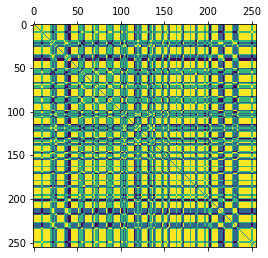

In [38]:
# Обнуление Матрицы

W = np.zeros((NEURON_COUNT, NEURON_COUNT))

# Запоминание Образов

for i in range(NEURON_COUNT):
    for j in range(NEURON_COUNT):
        if i == j:
            # Не трогаем, так как матрица состоит из нулей и так
            continue
        W[i, j] = (perfectSet[0][i] * perfectSet[0][j]) + (perfectSet[1][i] * perfectSet[1][j]) + (perfectSet[2][i] * perfectSet[2][j])
                
plt.matshow(W)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


100.0


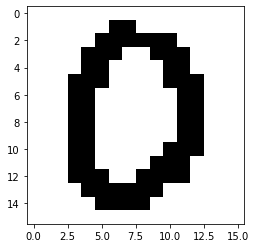

In [52]:
# Очистка первого образа

result = clearImage(noisySet[0])
img = ut.dataToImage(result, 1, -1, 16)
plt.imshow(img)

In [359]:
# Разобучить!
unteach(result)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


100.0


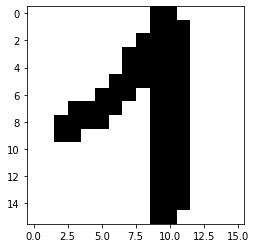

In [68]:
# Очистка второго образа

result = clearImage(noisySet[1])
img = ut.dataToImage(result, 1, -1, 16)
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


100.0


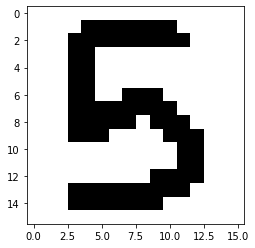

In [64]:
# Очистка третьего образа

# Разобучить!
unteach(result)

result = clearImage(noisySet[2])
img = ut.dataToImage(result, 1, -1, 16)
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


100.0


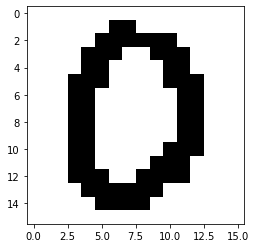

In [67]:
# Очистка третьего образа

# Разобучить!
unteach(result)

result = clearImage(noisySet[3])
img = ut.dataToImage(result, 1, -1, 16)
plt.imshow(img)

In [58]:
# Разобучить!
unteach(result)